<a href="https://colab.research.google.com/github/wonyoung-ji/statistics/blob/master/study/200927_6%EC%9E%A5_t_%EA%B2%80%EC%A0%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import pandas as pd

In [38]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# 1.t-검정 기초



## 1.1.평균 비교 분석 유형
- 평균을 비교하는 분석 기법: t-검정, z-검정, 분산분석 등
- 평균 비교 분석의 차이점
- 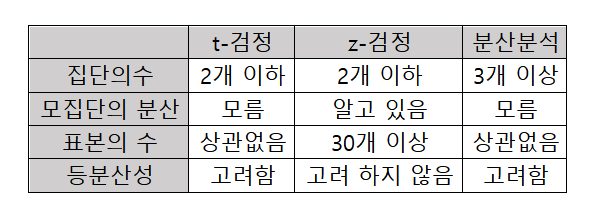

## 1.2.t-검정의 종류
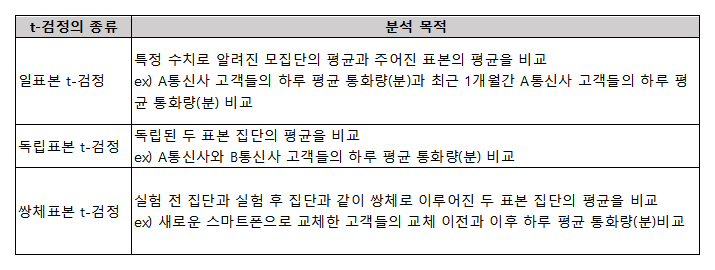

# 2.일표본 t-검정

## 2.1.개념 및 주요 이론
- 단일 표본의 수치형 변수의 평균 값이 기존에 받아들여졌던 특정값(모집단의 평균)과 실제로 일치하는지 판단할 수 있는 통계분석기법
- 모집단 ⇔ 표본
- t값은 모집단 평균과 표본 평균의 차이가 허용가능한 오차수준에 비패 몇 배 더 큰지 나타내는 값
- t값이 클수록, 모집단 평균과 표본 평균의 차이가 큼

## 2.2. z-검정과 t-검정
- 모분산을 아는 경우(z-검정), 모분산을 모르는 경우(t-검정)
- 각각 아래의 식을 통해 z값과 t값을 도출한 후 통계분포표를 이용하여 가설을 검정한다.
- t-검정의 경우 유의수준 95%이라면 t값의 임계치는 1.753(양측 +- 2.131)
- t값과 임계치를 비교하여 가설의 채택여부 결정
- 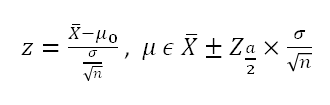
- 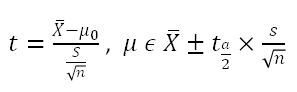
- 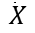 (표본평균)
- 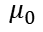 (모집단 평균)
- image.png( 모집단의 표준편차)
- image.png (표본의 표준편차)

## 2.3.분석 및 해석
- 쇼핑몰 VIP 고객들의 작년 평균 구매액은 약 700만원
- 귀무가설 = 쇼핑몰 VIP 고객들의 총 매출액 평균은 7,700,000원이다.
- 연구가설 = 쇼핑몰 VIP 고객들의 총 매출액 평균은 7,700,000원이 아니다.

In [39]:
df = pd.read_csv('/content/gdrive/My Drive/통계/Ashopping.csv', sep=',', encoding='CP949')
df.head()

,고객ID,이탈여부,총_매출액,방문빈도,1회_평균매출액,할인권_사용 횟수,총_할인_금액,고객등급,구매유형,클레임접수여부,구매_카테고리_수,거주지역,성별,고객_나이대,거래기간,할인민감여부,멤버쉽_프로그램_가입전_만족도,멤버쉽_프로그램_가입후_만족도,Recency,Frequency,Monetary,상품_만족도,매장_만족도,서비스_만족도,상품_품질,상품_다양성,가격_적절성,상품_진열_위치,상품_설명_표시,매장_청결성,공간_편의성,시야_확보성,음향_적절성,안내_표지판_설명,친절성,신속성,책임성,정확성,전문성
0,1,0,4007080,17,235711,1,5445,1,4,0,6,6,1,4,1079,0,5,7,7,3,4,6,5,6,7,7,6,7.0,6.0,6,7,6,6,6,6,6,6,6,6
1,2,1,3168400,14,226314,22,350995,2,4,0,4,4,1,1,537,0,2,3,2,3,3,2,5,4,6,7,6,6.0,NaN,7,7,6,6,6,5,3,6,6,6
2,3,0,2680780,18,148932,6,186045,1,4,1,6,6,1,6,1080,0,6,6,7,3,2,4,6,7,6,7,6,7.0,NaN,6,6,6,6,6,7,7,6,6,7
3,4,0,5946600,17,349800,1,5195,1,4,1,5,5,1,6,1019,0,3,5,7,3,5,3,5,5,6,6,6,5.0,6.0,6,6,5,6,6,6,6,6,5,6
4,5,0,13745950,73,188301,9,246350,1,2,0,6,6,0,6,1086,0,5,6,7,6,7,5,6,6,5,6,6,5.0,6.0,5,6,6,6,5,5,6,6,5,6


In [40]:
from scipy import stats   # 수치해석 기능 라이브러리, 확률과 통계 분석을 위한 함수 
print('총매출액 평균:',df.총_매출액.mean())
print(stats.ttest_1samp(df['총_매출액'],7700000))  # ttest_1samp(data, popmean): popmean은 귀무가설 상의 기대 값

총매출액 평균: 7068689.76
Ttest_1sampResult(statistic=-2.8657430145836007, pvalue=0.00424758614832654)


- 산술평균 = 7068689(원)
- t-value = -2.865...
- p-value = 0.0042...
- 1.753 > t-value 이므로 귀무가설을 기각되어 쇼핑몰 VIP 고객들의 총 매출액 평균은 7,700,000원이라고 할 수 없다.
- 실제로 VIP 고객들의 매출액 평균이 706만원이었다.

# 3.독립표본 t-검정

## 3.1.개념 및 주요 이론
- 모집단A의 표본A ⇔ 모집단B의 표본B 
- ex) 남/녀 그룹의 구매액 차이, 수도권/비수도권 고객의 교차구매지수 비교 등

## 3.2.두 표본의 분산 동일 여부
- 독립표본 t-검정은 독립된 두 표본의 분산이 같을 경우와 분산이 다를 경우 적용되는 공식이 다름

- 두 표본의 분산이 같을 경우
- 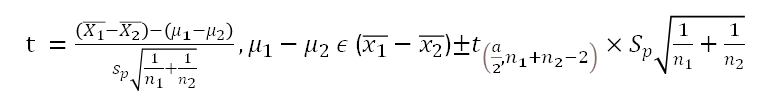

- 두 표본의 분산이 다를 경우
- 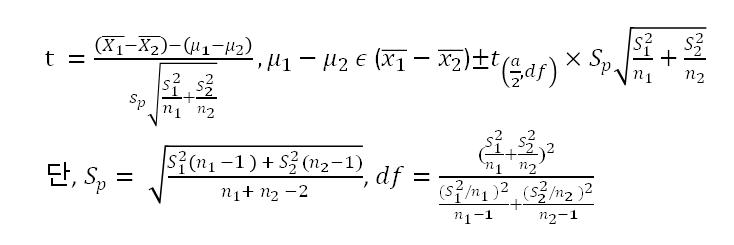

## 3.3.분석 및 해석
- 클레임고객은 매장을 찾는 횟수가 적어져 이탈위험도 높음
- 클레임고객을 위한 마케팅을 세우기 위해서, 클레임고객과 비클레임고객간의 매장방문횟수가 실제로 다른지 검증 필요
- 귀무가설 = 쇼핑몰 클레임고객과 비클레임고객들의 방문횟수 차이는 없다
- 연구가설 = 쇼핑몰 클레임고객과 비클레임고객들의 방문횟수 차이는 있다.

In [41]:
import numpy as np
df.head()

,고객ID,이탈여부,총_매출액,방문빈도,1회_평균매출액,할인권_사용 횟수,총_할인_금액,고객등급,구매유형,클레임접수여부,구매_카테고리_수,거주지역,성별,고객_나이대,거래기간,할인민감여부,멤버쉽_프로그램_가입전_만족도,멤버쉽_프로그램_가입후_만족도,Recency,Frequency,Monetary,상품_만족도,매장_만족도,서비스_만족도,상품_품질,상품_다양성,가격_적절성,상품_진열_위치,상품_설명_표시,매장_청결성,공간_편의성,시야_확보성,음향_적절성,안내_표지판_설명,친절성,신속성,책임성,정확성,전문성
0,1,0,4007080,17,235711,1,5445,1,4,0,6,6,1,4,1079,0,5,7,7,3,4,6,5,6,7,7,6,7.0,6.0,6,7,6,6,6,6,6,6,6,6
1,2,1,3168400,14,226314,22,350995,2,4,0,4,4,1,1,537,0,2,3,2,3,3,2,5,4,6,7,6,6.0,NaN,7,7,6,6,6,5,3,6,6,6
2,3,0,2680780,18,148932,6,186045,1,4,1,6,6,1,6,1080,0,6,6,7,3,2,4,6,7,6,7,6,7.0,NaN,6,6,6,6,6,7,7,6,6,7
3,4,0,5946600,17,349800,1,5195,1,4,1,5,5,1,6,1019,0,3,5,7,3,5,3,5,5,6,6,6,5.0,6.0,6,6,5,6,6,6,6,6,5,6
4,5,0,13745950,73,188301,9,246350,1,2,0,6,6,0,6,1086,0,5,6,7,6,7,5,6,6,5,6,6,5.0,6.0,5,6,6,6,5,5,6,6,5,6


In [42]:
# 등분산 검정
no_claim = df[df.클레임접수여부==0]
df_2 = np.array(no_claim.방문빈도)
claim = df[df.클레임접수여부==1]
df_3 = np.array(claim.방문빈도)

stats.bartlett(df_2,df_3)

BartlettResult(statistic=13.626177910965525, pvalue=0.00022305349806448475)

- 등분산 검정을 위해 bartlet 함수 사용
- bartlett은 배열로 데이터를 입력 받기 때문에 데이터를 배열로 변환
- 등분산 검정 방법: bartlett, flinger, levene 등
  + bartlett: 데이터가 정규분포일 때
  + flinger: 비모수 검정으로써 정규성을 논하기 어려울 때
  + levene: 데이터가 정규분포를 따르지 않을 때
- 두 그룹 간 등분산 검정 결과 F값은 13.626, p-value는 0.0002
- p-value<0.05(유의수준) 이므로 귀무가설 기각 및 두 집단 간 분산은 동일하지 않음

In [43]:
# 독립표본 t검정 및 방문빈도 평균
print(stats.ttest_ind(df_2,df_3,equal_var=False))
print('클레임 접수여부(0)고객 평균방문빈도:',no_claim.방문빈도.mean())
print('클레임 접수여부(1)고객 평균방문빈도:',claim.방문빈도.mean())

Ttest_indResult(statistic=2.595726838875684, pvalue=0.009577734932789503)
클레임 접수여부(0)고객 평균방문빈도: 28.184842883548985
클레임 접수여부(1)고객 평균방문빈도: 24.736383442265794


- 독립표본 t-검정은 ttest_ind 함수를 사용. equl_val은 등분산 여부
- t-value는 2.60, p-value는 0.0096
- 1.753 < t-value 이므로 귀무가설 기각 및 연구가설 채택(쇼핑몰 클레임고객과 비클레임고객들의 방문횟수 차이는 있다)
- 실제로, 클레임 접수 경험이 없는 고객의 평균 방문빈도는 28.18회, 클레임 접수 경험이 있는 고객의 평균 방문빈도는 24.7회 

# 4.쌍체표본 t-검정

## 4.1. 개념 및 주요 이론
- 동일한 표본이 두 개의 서로 다른 상황에서 특정 수치형 변수의 평균 동일 여부 판단
- 실험 전 표본 ⇔ 실험 후 표본, 실험 전 모집단 ⇔ 실험 후 모집단
- ex) 동일한 고객 집단의 멤버십 프로그램 사용 이전과 사용 이후의 고객 구매액 비교
- 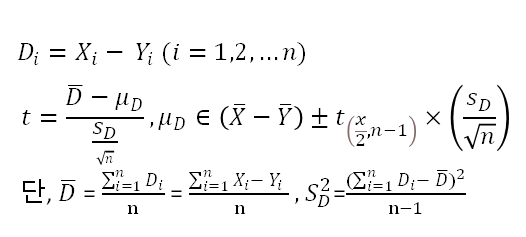

- 쌍체표본 t-검정은분석 대상의 표본이 반드시 대응되어야 한다.
- 데이터가 완전한 쌍체를 이루지 않는다면 결측 값이 존재하는 것이므로 결측값을 처리해야 한다.
- 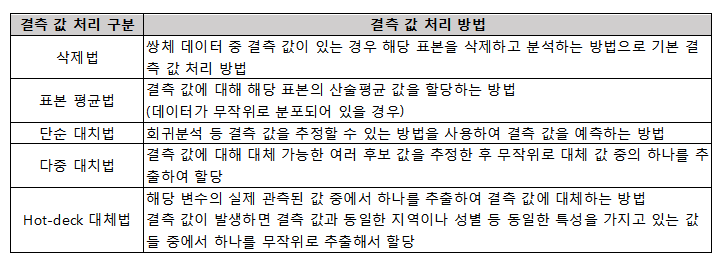

## 4.2.분석 및 해석
- 신규 멤버십 프로그램 도입 전과 도입 후의 고객만족도의 변화
- 귀무가설 = 쇼핑몰 고객들의 멤버십 프로그램 도입 전 만족도와 도입 후 만족도의 차이는 없다
- 연구가설 = 쇼핑몰 고객들의 멤버십 프로그램 도입 전 만족도와 도입 후 만족도의 차이는 있다

In [44]:
df.head()

,고객ID,이탈여부,총_매출액,방문빈도,1회_평균매출액,할인권_사용 횟수,총_할인_금액,고객등급,구매유형,클레임접수여부,구매_카테고리_수,거주지역,성별,고객_나이대,거래기간,할인민감여부,멤버쉽_프로그램_가입전_만족도,멤버쉽_프로그램_가입후_만족도,Recency,Frequency,Monetary,상품_만족도,매장_만족도,서비스_만족도,상품_품질,상품_다양성,가격_적절성,상품_진열_위치,상품_설명_표시,매장_청결성,공간_편의성,시야_확보성,음향_적절성,안내_표지판_설명,친절성,신속성,책임성,정확성,전문성
0,1,0,4007080,17,235711,1,5445,1,4,0,6,6,1,4,1079,0,5,7,7,3,4,6,5,6,7,7,6,7.0,6.0,6,7,6,6,6,6,6,6,6,6
1,2,1,3168400,14,226314,22,350995,2,4,0,4,4,1,1,537,0,2,3,2,3,3,2,5,4,6,7,6,6.0,NaN,7,7,6,6,6,5,3,6,6,6
2,3,0,2680780,18,148932,6,186045,1,4,1,6,6,1,6,1080,0,6,6,7,3,2,4,6,7,6,7,6,7.0,NaN,6,6,6,6,6,7,7,6,6,7
3,4,0,5946600,17,349800,1,5195,1,4,1,5,5,1,6,1019,0,3,5,7,3,5,3,5,5,6,6,6,5.0,6.0,6,6,5,6,6,6,6,6,5,6
4,5,0,13745950,73,188301,9,246350,1,2,0,6,6,0,6,1086,0,5,6,7,6,7,5,6,6,5,6,6,5.0,6.0,5,6,6,6,5,5,6,6,5,6


In [45]:
stats.ttest_rel(df['멤버쉽_프로그램_가입후_만족도'],df['멤버쉽_프로그램_가입후_만족도'])

Ttest_relResult(statistic=nan, pvalue=nan)

- t-value는 29.560, p-value는 0.0001 이하
- 1.753 < t-value 이므로 귀무가설 기각 및 연구가설 채택(신규 프로그램의 가입 전 고객만족도와 가입 후 고객만족도는 차이가 있다)